# Identifying mislabelled tags
- Go through all directories and sort by brightness to make cleaning easier

In [1]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.4.1
OS Darwin 16.6.0 x86_64 i386 64bit
numpy 1.13.0
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.2
Thu Jul 13 11:28:55 2017 AEST

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy

import os
import sys
import glob
import hashlib
import uuid
from sklearn.metrics import mean_squared_error

#sys.path.append("../src")
#from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

## Sort by pixel total

In [3]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/training/merged/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/Users/jacksimpson/Data/beeunique/training/merged/0/', 62)


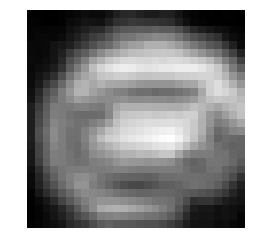

In [6]:
im = cv2.imread('/Users/jacksimpson/Data/beeunique/training/merged/0/09568684261546798859c35b8fda5cbf.png', cv2.IMREAD_GRAYSCALE)
view(im)

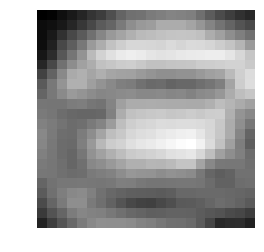

In [9]:
view(im[3:25, 3:25])

In [10]:
images = {}

for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    images[image_class_name] = []
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        images[image_class_name].append((image[3:25, 3:25].sum(), image))

('0', '/Users/jacksimpson/Data/beeunique/training/merged/0/')
('1', '/Users/jacksimpson/Data/beeunique/training/merged/1/')
('2', '/Users/jacksimpson/Data/beeunique/training/merged/2/')
('3', '/Users/jacksimpson/Data/beeunique/training/merged/3/')
('4', '/Users/jacksimpson/Data/beeunique/training/merged/4/')
('5', '/Users/jacksimpson/Data/beeunique/training/merged/5/')
('6', '/Users/jacksimpson/Data/beeunique/training/merged/6/')
('7', '/Users/jacksimpson/Data/beeunique/training/merged/7/')
('8', '/Users/jacksimpson/Data/beeunique/training/merged/8/')
('a', '/Users/jacksimpson/Data/beeunique/training/merged/a/')
('AA', '/Users/jacksimpson/Data/beeunique/training/merged/AA/')
('Ampersand', '/Users/jacksimpson/Data/beeunique/training/merged/Ampersand/')
('Ankh', '/Users/jacksimpson/Data/beeunique/training/merged/Ankh/')
('arrowhollow', '/Users/jacksimpson/Data/beeunique/training/merged/arrowhollow/')
('ArrowLine', '/Users/jacksimpson/Data/beeunique/training/merged/ArrowLine/')
('Asterisk

In [11]:
print(images.keys())

['CircleLine', 'heart', 'Note1', 'DD', 'Note2', 'EE', 'Pillars', 'HH', 'Ampersand', 'Plant', 'leaf', 'arrowhollow', 'nn', 'Ankh', 'sun', 'TT', 'Trident', 'Asterisk', 'UU', '1', '0', '3', '2', '5', '4', '7', '6', '8', 'Omega', 'CircleCross', 'AA', 'SS', 'Peace', 'hash', 'Tadpole', 'ArrowLine', 'Question', 'RR', 'PP', 'lines3', 'GG', 'y', 'XX', 'ZZ', 'radioactive', 'Triangle', 'Umbrella', 'Dot', 'a', 'e', 'Power', 'KK', 'h', 'Queen', 'Plane', 'MM', 'r', 'circlehalf', 'w', 'unknown', 'necklace', 'Scissors']


In [12]:
for tag in images.keys():
    n = 0
    tag_class_dir = '/Users/jacksimpson/Data/beeunique/training/merged_sorted/{}'.format(tag)
    images[tag].sort(key=lambda x: x[0])
    os.makedirs(tag_class_dir)
    for im_sum, im in images[tag]:
        n += 1
        fname = tag_class_dir + '/' + str(n) + '_' + uuid.uuid4().hex + '.png'
        cv2.imwrite(fname, im)